### Implement a neural network to recognize handwritten digits from MNIST dataset

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from keras.optimizers import SGD
from keras.utils import np_utils
import time
import random

## Data Visualization

x_train: (60000, 28, 28) y_train: (60000,)
x_text: (10000, 28, 28) y_test: (10000,)


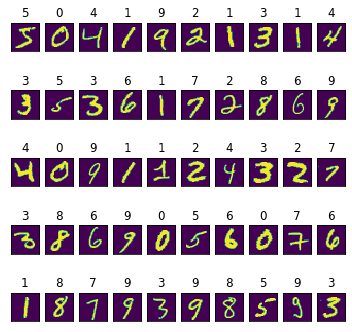

In [2]:
# Import the mnist dataset from Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train:',x_train.shape,'y_train:',y_train.shape)
print('x_text:',x_test.shape,'y_test:',y_test.shape)

#visualize the dataset
fig = plt.figure(figsize=[6,6])
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(x_train[i],cmap=None,interpolation='none')
    plt.title("{}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

Construct a network of 3 layers own implementation 

### Layer structure
- An input layer (since image has size 28x28 you will have 784 input nodes, other source can have 20x20 in that case it is 400)

- A hidden layer with 25 nodes 

- An output layer with 10 classes (corresponding to the 10 digits)

- Implement (from scratch) feedforward propagation for this neural network to predict handwritten digits 

- Implement (from scratch) the backpropagation algorithm to learn the parameters for the network. Use cross-entropy loss function without regularization.

### Hyperparameters

- Loss function - Cross-entropy without regularization
- Learning method - Stochastic Gradient Descent
- Metrics - Accuracy 
- Activation method - relu/sigmoid for hidden layer; softmax for output layer
- Batch size - 128
- Epochs- 50

### Output

- Accuracy
- Confusion matrix

**Note:** For the simplicity recode the labels as vectors containing only values 0 or 1 (One hot encoding).

**Steps in creating 3 layer network**<br>
1) Load and preprocess data as X_train,Y_train,X_test,Y_test<br>

2) Initialize weights and bias by assigning random values as W1,b1,W2,b2. <br>
3) Define method for forward propagation:<br>

  - Calculate linear output using weights and bias<br>
    \begin{equation}
    Z_1 = W_1 *x + b_1
    \end{equation}
    Where x = input, $W_1$ = weight matrix, $b_1$ = bias<br>
  - $Z_1$ is passed through ReLU activation function denoted as $a_1$<br>
\begin{equation}
a_1 = ReLU(Z_1)
\end{equation}
  - $a_1$ is given to the next layer for computing linear output <br>
 \begin{equation}
    Z_2 = W_2 *a_1 + b_2
    \end{equation}
  - $Z_2$ is passed to the output layer with softmax activation function, which outputs prediction<br>
\begin{equation}
    prediction = softmax(Z_2)
    \end{equation}

4) Define method for backward propagation<br>
Backward propagation is performed by updating the weight parameters to loss minimize the loss.
  - Derivative of error function ($dZ_2$) using cross-entropy loss function.<br>
  - Derivative of $W_2$ is determined using the given formula<br>
  \begin{equation}
  (1/m)*prediction^T *dZ_2
  \end{equation}
  Where $m = y.shape[0]$
  - Derivative of $b_2$ is determined using the given formula<br>
  \begin{equation}
  (1/m)*\sum dZ_2
  \end{equation}
  - Same is repeated to find derivative of weights and bias in other layers ($dZ_1,dW_1,db_1$)
  - Now the weights and bias are updated using the learning rate=0.001 and derivatives as below<br>

  \begin{equation}
  W_1 = W_1 -learning\_ rate *dW1
  \end{equation}
  
  \begin{equation}
  b_1 = b_1 -learning\_rate *db1
  \end{equation}

  \begin{equation}
  W_2 = W_2 -learning\_rate *dW2
  \end{equation}

  \begin{equation}
  b_2 = b_2 -learning\_rate *db2
  \end{equation}

5) Perform network training for 50 epochs. Now the network trains using forward and backward propagation methods defined above.<br>
6) Model prediction can be performed using forward propagation for test data.<br>
7) Model is evaluated by using accuracy.<br>

In [3]:
input_units = 784
batch_size = 128
epochs = 50
num_classes = 10

In [4]:
#Class for training and testing network having forward and backward propagation
class Network:
    #Initialization of variables
    def __init__(self, num_nodes_in_layers, batch_size, epochs,learning_rate):

        self.num_nodes_in_layers = num_nodes_in_layers
        self.batch_size = batch_size
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.W1 = np.random.normal(0, 1, [self.num_nodes_in_layers[0], self.num_nodes_in_layers[1]])
        self.b1 = np.zeros((1, self.num_nodes_in_layers[1]))
        self.W2 = np.random.normal(0, 1, [self.num_nodes_in_layers[1], self.num_nodes_in_layers[2]])
        self.b2 = np.zeros((1, self.num_nodes_in_layers[2]))
        self.loss = []
    
    #Training the model    
    def train(self, x, y):
        
        start_time = time.time()
        #Loop for epochs
        for epoch in range(self.epochs): 
            iteration = 0
            while iteration < len(x):

                # Batch input
                x_batch = x[iteration:iteration+self.batch_size]
                y_batch = y[iteration:iteration+self.batch_size]
                
                # Forward propagation
                Z1 = np.dot(x_batch, self.W1) + self.b1
                a1 = relu(Z1)
                Z2 = np.dot(a1, self.W2) + self.b2
                prediction = softmax(Z2)
                
                # Calculate Cross-entropy loss
                loss = cross_entropy(prediction, y_batch)
                self.loss.append(loss)

                # Backward propagation
                dZ2 = (prediction - y_batch) / prediction.shape[0]
                dW2 = np.dot(a1.T, dZ2)
                db2 = np.sum(dZ2, axis = 0, keepdims = True)
                
                dZ1 = np.dot(dZ2, self.W2.T) 
                dZ1[a1 <= 0] = 0 
                dW1 = np.dot(x_batch.T, dZ1)
                db1 = np.sum(dZ1, axis = 0, keepdims = True)

                # Update weights and bias - stochastic gradient descent
                self.W1 = self.W1 - self.learning_rate * dW1
                self.b1 = self.b1 - self.learning_rate * db1
                self.W2 = self.W2 - self.learning_rate * dW2
                self.b2 = self.b2 - self.learning_rate * db2

                iteration += self.batch_size
            print('Epoch: {:d}/{:d}\tLoss: {:.2f}'.format(epoch+1, self.epochs, loss))
        end_time = time.time()
        print("Time required for training our model", end_time-start_time,"seconds")
    
    # Obtaining prediction accuracy
    def test(self, x, y):
        input_layer = np.dot(x, self.W1)
        hidden_layer = relu(input_layer + self.b1)
        accuracy_scores = np.dot(hidden_layer, self.W2) + self.b2
        probs = softmax(accuracy_scores)
        acc = float(np.sum(np.argmax(probs, 1) == y)) / float(len(y))
        print('Test accuracy: {:.2f}%'.format(acc*100))

# Activation functions
def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    soft = np.exp(x)
    return soft/np.sum(soft, axis = 1, keepdims = True)

# Cross entropy loss
def cross_entropy(x, y):
    indices = np.argmax(y, axis = 1).astype(int)
    probability = x[np.arange(len(x)), indices] #inputs[0, indices]
    log = np.log(probability)
    loss = -1.0 * np.sum(log) / len(log)
    return loss

In [5]:
#Preprocess data

#Training data
X_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]).astype('float32')
X_train = X_train / 255
#One-hot encoding
Y_train = np.eye(num_classes)[y_train] 

#Testing data
X_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]).astype('float32')
X_test = X_test / 255
Y_test = y_test

network = Network(num_nodes_in_layers = [784, 25, 10], batch_size = 128, epochs = 50, learning_rate = 0.1)
#Training the model
network.train(X_train, Y_train)
#Testing the model
network.test(X_test, Y_test)

Epoch: 1/50	Loss: 1.62
Epoch: 2/50	Loss: 1.22
Epoch: 3/50	Loss: 1.05
Epoch: 4/50	Loss: 0.94
Epoch: 5/50	Loss: 0.88
Epoch: 6/50	Loss: 0.83
Epoch: 7/50	Loss: 0.80
Epoch: 8/50	Loss: 0.77
Epoch: 9/50	Loss: 0.74
Epoch: 10/50	Loss: 0.72
Epoch: 11/50	Loss: 0.70
Epoch: 12/50	Loss: 0.68
Epoch: 13/50	Loss: 0.66
Epoch: 14/50	Loss: 0.65
Epoch: 15/50	Loss: 0.64
Epoch: 16/50	Loss: 0.63
Epoch: 17/50	Loss: 0.62
Epoch: 18/50	Loss: 0.62
Epoch: 19/50	Loss: 0.61
Epoch: 20/50	Loss: 0.61
Epoch: 21/50	Loss: 0.61
Epoch: 22/50	Loss: 0.60
Epoch: 23/50	Loss: 0.60
Epoch: 24/50	Loss: 0.60
Epoch: 25/50	Loss: 0.60
Epoch: 26/50	Loss: 0.60
Epoch: 27/50	Loss: 0.59
Epoch: 28/50	Loss: 0.59
Epoch: 29/50	Loss: 0.59
Epoch: 30/50	Loss: 0.59
Epoch: 31/50	Loss: 0.59
Epoch: 32/50	Loss: 0.58
Epoch: 33/50	Loss: 0.58
Epoch: 34/50	Loss: 0.58
Epoch: 35/50	Loss: 0.58
Epoch: 36/50	Loss: 0.57
Epoch: 37/50	Loss: 0.57
Epoch: 38/50	Loss: 0.57
Epoch: 39/50	Loss: 0.57
Epoch: 40/50	Loss: 0.56
Epoch: 41/50	Loss: 0.56
Epoch: 42/50	Loss: 0.56
E

## Implementation using Keras

In [6]:
#Preprocess data
def load_data(x_train,y_train,x_test,y_test):
    
    X_train = x_train.reshape(x_train.shape[0],-1)
    X_test = x_test.reshape(x_test.shape[0],-1)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train = X_train/255
    X_test = X_test/255
    Y_train = y_train.reshape(-1,y_train.shape[0])
    Y_test = y_test.reshape(-1,y_test.shape[0])
    
    return X_train,Y_train,X_test,Y_test
#Loaading the data
X_train,Y_train,X_test,Y_test = load_data(x_train,y_train,x_test,y_test)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 784)
(10000, 784)
(1, 60000)
(1, 10000)


In [7]:
start_time = time.time()
#Define model
model = Sequential()

#One-hot encoding
Y_train = keras.utils.to_categorical(y_train,num_classes)    
Y_test = keras.utils.to_categorical(y_test,num_classes)

model.add(Dense(25,input_shape=(784,),activation='relu'))
model.add(Dense(10, activation='softmax'))

#Compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='SGD')

#Training the model for 50 epochs
History = model.fit(X_train, Y_train, batch_size=128, epochs=50, validation_data=(X_test, Y_test))
end_time = time.time()
print("Time required for Keras model",end_time-start_time,"seconds")

Epoch 1/50
469/469 [==============================] - 1s 3ms/step - loss: 1.3250 - accuracy: 0.6694 - val_loss: 0.7388 - val_accuracy: 0.8339
Epoch 2/50
469/469 [==============================] - 1s 2ms/step - loss: 0.6231 - accuracy: 0.8469 - val_loss: 0.5042 - val_accuracy: 0.8727
Epoch 3/50
469/469 [==============================] - 1s 2ms/step - loss: 0.4838 - accuracy: 0.8735 - val_loss: 0.4251 - val_accuracy: 0.8879
Epoch 4/50
469/469 [==============================] - 1s 3ms/step - loss: 0.4249 - accuracy: 0.8852 - val_loss: 0.3849 - val_accuracy: 0.8961
Epoch 5/50
469/469 [==============================] - 1s 3ms/step - loss: 0.3916 - accuracy: 0.8927 - val_loss: 0.3604 - val_accuracy: 0.9014
Epoch 6/50
469/469 [==============================] - 1s 2ms/step - loss: 0.3697 - accuracy: 0.8976 - val_loss: 0.3435 - val_accuracy: 0.9055
Epoch 7/50
469/469 [==============================] - 1s 2ms/step - loss: 0.3536 - accuracy: 0.9018 - val_loss: 0.3313 - val_accuracy: 0.9094
Epoch 

In [11]:
#Model prediction
predict = model.predict_classes(X_test)
correct_indices = np.nonzero(predict== y_test)[0]
incorrect_indices = np.nonzero(predict!= y_test)[0]
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

9448  classified correctly
552  classified incorrectly


In [13]:
#Printing various metrics for evaluation
print("Confusion matrics",confusion_matrix(y_test,predict))
print("Accuracy score",accuracy_score(y_test,predict))
print("Classification report",classification_report(y_test,predict))

Confusion matrics [[ 961    0    1    3    0    4    6    4    1    0]
 [   0 1115    3    2    0    1    3    2    9    0]
 [   7    4  961   10    5    2    8   10   20    5]
 [   2    0   17  946    1   12    1   12   16    3]
 [   2    1    2    1  929    1   11    2    5   28]
 [   9    1    2   16    6  824   12    4   13    5]
 [  10    3    4    0   10   12  914    1    4    0]
 [   3    8   23    4    5    0    0  967    2   16]
 [   7    3    5   12    7    9   10    8  906    7]
 [  10    7    1   10   29    6    1   16    4  925]]
Accuracy score 0.9448
Classification report               precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.93      0.94      1032
           3       0.94      0.94      0.94      1010
           4       0.94      0.95      0.94       982
           5       0.95      0.92      0.93       892
           6       0.95     

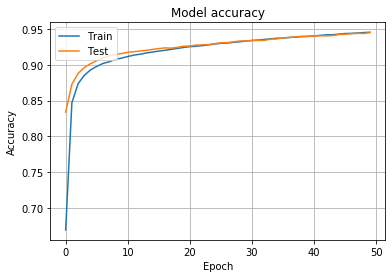

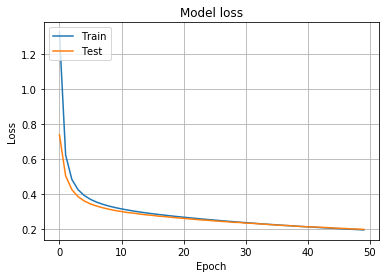

In [14]:
# Plot for accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



**Comparison**<br>
1) Time required for training our model is less compared to keras model<br>
2) Accuracy of Keras model is higher than our model<br>